## Análisis EDA: Documentos Tender

### 1. Carga de datos

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#### Leyendo el dataset, convirtiéndolo a parquet y mostrando los primeros rows

In [3]:
documentos_df = pd.read_csv('../../data/Processed/All_Tables_Raw/documentos_tender_data_V2_Raw.csv')
documentos_df.to_parquet('../../data/Processed/parquet_files/documentos_tender_data_V2_Raw.parquet')

In [4]:
documentos_df = pd.read_parquet('../../data/Processed/parquet_files/documentos_tender_data_V2_Raw.parquet')

In [6]:
documentos_df.shape

(840404, 9)

### 2. Análisis del problema

#### 2.1 Estructura de los datos

In [8]:
documentos_df.head()

,cve_expediente,docs_title_tender,docs_type_tender,docs_language_tender,docs_date_published_tender,docs_id_tender,docs_format_tender,docs_description_tender,docs_url_tender
0,2241924,ACTA DE JUNTA DE ACLARACIONES.pdf,clarifications,es,2021-09-23T18:05:00Z,53820208,text/html,Acta junta de aclaraciones,https://compranet.hacienda.gob.mx/esop/guest/g...
1,2241924,BASES MTTO VEHICULOS ELECRONICA PDF.pdf,tenderNotice,es,2021-09-13T22:16:00Z,53637170,text/html,Convocatoria / Invitación,https://compranet.hacienda.gob.mx/esop/guest/g...
2,2270459,CIERRE DE JUNTA.pdf,clarifications,es,2021-09-14T18:04:00Z,53657555,text/html,Acta junta de aclaraciones,https://compranet.hacienda.gob.mx/esop/guest/g...
3,2270459,CONVOCATORIA MTTO. EST. SISMOLÓGICAS.docx,tenderNotice,es,2021-09-08T12:02:00Z,53532756,text/html,Convocatoria / Invitación,https://compranet.hacienda.gob.mx/esop/guest/g...
4,2273440,Anexo 10 LP Arrendamiento de Ultrasonido Doppl...,tenderNotice,es,2021-09-10T08:54:00Z,53585423,text/html,Convocatoria / Invitación,https://compranet.hacienda.gob.mx/esop/guest/g...


In [9]:
documentos_df.tail()

,cve_expediente,docs_title_tender,docs_type_tender,docs_language_tender,docs_date_published_tender,docs_id_tender,docs_format_tender,docs_description_tender,docs_url_tender
840399,2571346,CE E4 2023 Lumbrera 3.doc,tenderNotice,es,2023-08-22T14:44:00Z,63122565,text/html,Convocatoria / Invitación,https://compranet.hacienda.gob.mx/esop/guest/g...
840400,2571346,Acta Junta de Aclaraciones CE-016B00985-E4-202...,clarifications,es,2023-08-29T11:40:00Z,63126963,text/html,Acta junta de aclaraciones,https://compranet.hacienda.gob.mx/esop/guest/g...
840401,2571413,02.- Convocatoria_vestuario.docx,tenderNotice,es,2023-08-25T13:59:00Z,63125173,text/html,Convocatoria / Invitación,https://compranet.hacienda.gob.mx/esop/guest/g...
840402,2571516,BasesLPI (2 lotes - 5pozos)_CE-018T0K001-E12-2...,tenderNotice,es,2023-08-31T09:56:00Z,63129747,text/html,Convocatoria / Invitación,https://compranet.hacienda.gob.mx/esop/guest/g...
840403,2571566,CONVOCATORIA telefonia 2023.pdf,tenderNotice,es,2023-09-01T18:23:00Z,63131419,text/html,Convocatoria / Invitación,https://compranet.hacienda.gob.mx/esop/guest/g...


#### 2.2 Información General

In [10]:
documentos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840404 entries, 0 to 840403
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   cve_expediente              840404 non-null  int64 
 1   docs_title_tender           840404 non-null  object
 2   docs_type_tender            840404 non-null  object
 3   docs_language_tender        840404 non-null  object
 4   docs_date_published_tender  840404 non-null  object
 5   docs_id_tender              840404 non-null  int64 
 6   docs_format_tender          840404 non-null  object
 7   docs_description_tender     840404 non-null  object
 8   docs_url_tender             840404 non-null  object
dtypes: int64(2), object(7)
memory usage: 57.7+ MB


#### 2.3 Estadísticas descriptivas

En este caso no hay estadísitcas descriptivas porque no tenemos variables numéricas en la tabla documentos_tender

### 3. Análisis Univariado

### 3.1 Variables Categóricas

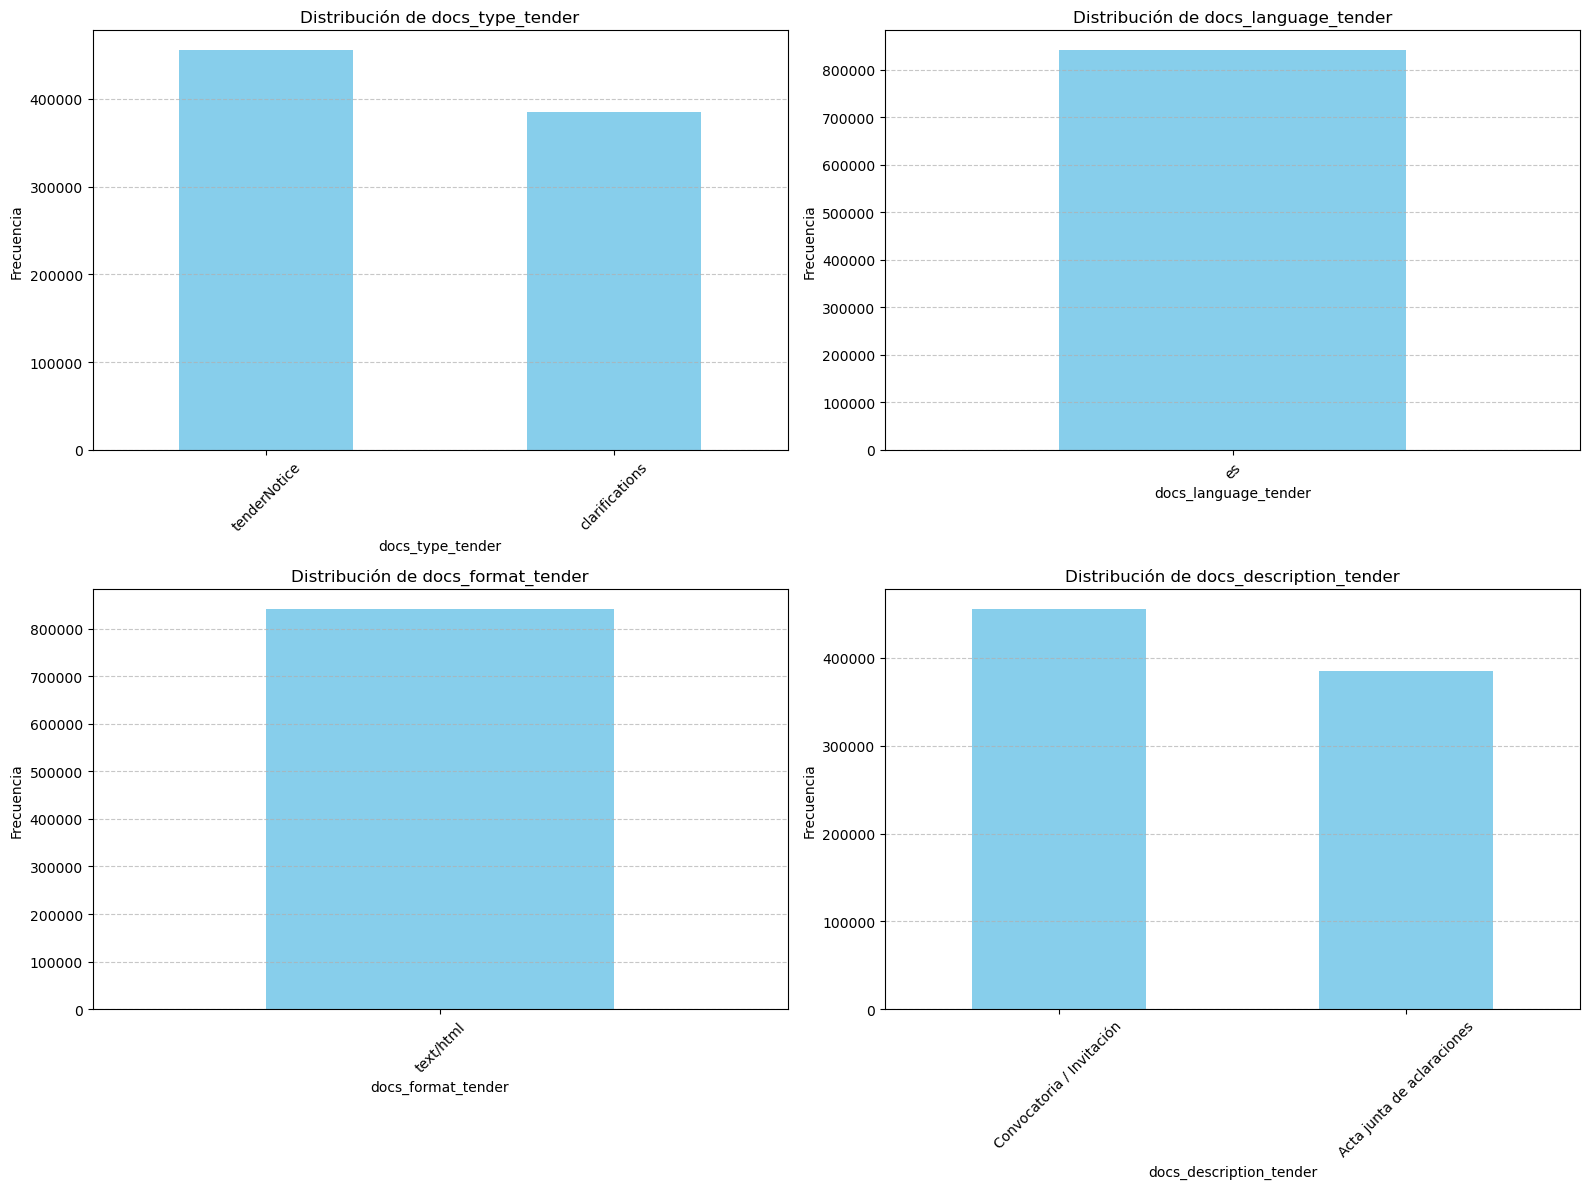

In [12]:
# Lista de columnas categóricas
categorical_columns = [
    'docs_type_tender',
    'docs_language_tender',
    'docs_format_tender',
    'docs_description_tender'
]

# Configurar el tamaño de las figuras y el layout para no tener que hacer scroll
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Iterar a través de las columnas y crear histogramas
for i, col in enumerate(categorical_columns):
    documentos_df[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout para evitar superposición
plt.tight_layout()
plt.show()


### 5. Detección de Outliers

En este caso no hay detección de outliers porque no tenemos variables numéricas en la tabla documentos_tender

### 6. Análisis Multivariado

#### 6.1 Análisis temporal de la publicación de documentos.

C:\Users\MottumTech\AppData\Local\Temp\ipykernel_5352\2824435811.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  time_series = documentos_df.groupby([documentos_df['docs_date_published_tender'].dt.to_period('M'), 'docs_type_tender']).size().unstack().fillna(0)


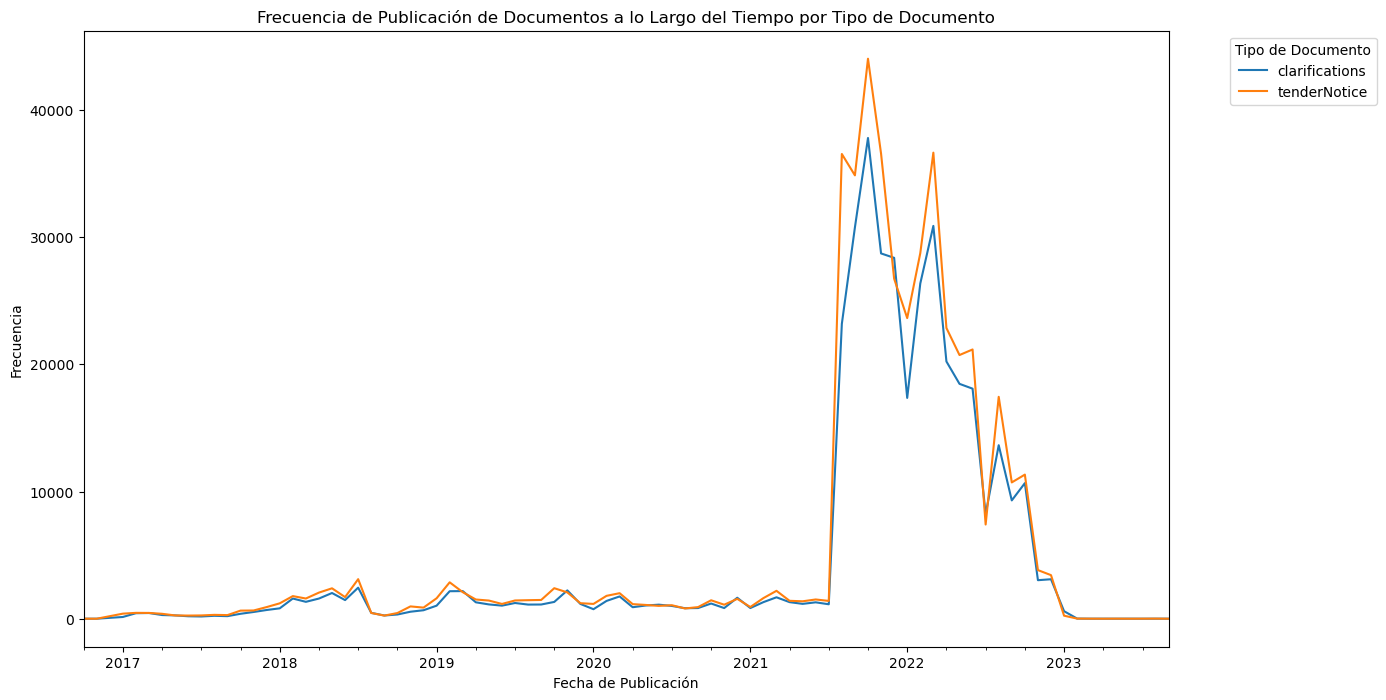

In [13]:
# Convertir la columna a datetime
documentos_df['docs_date_published_tender'] = pd.to_datetime(documentos_df['docs_date_published_tender'])

# Crear series temporales para cada tipo de documento
time_series = documentos_df.groupby([documentos_df['docs_date_published_tender'].dt.to_period('M'), 'docs_type_tender']).size().unstack().fillna(0)

# Plot
time_series.plot(figsize=(14, 8))
plt.title('Frecuencia de Publicación de Documentos a lo Largo del Tiempo por Tipo de Documento')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de Documento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 7. Preguntas de Negocio

#### 7.1 Número de documentos por expediente

In [18]:
# Calcular la cantidad de documentos por expediente
docs_per_expediente = documentos_df.groupby('cve_expediente').size().reset_index(name='total_docs')

# Unir con el tipo de documento
docs_per_expediente_type = documentos_df.groupby(['cve_expediente', 'docs_type_tender']).size().unstack().fillna(0)

# Crear un DataFrame con los resultados
result_df = docs_per_expediente.merge(docs_per_expediente_type, on='cve_expediente', how='left')

# Mostrar el DataFrame resultante
result_df.sort_values(by='total_docs', ascending=False).head(10)

,cve_expediente,total_docs,clarifications,tenderNotice
68585,2309037,54,27.00,27.00
68245,2304056,54,27.00,27.00
61987,2241924,54,27.00,27.00
68575,2308861,54,27.00,27.00
68576,2308869,54,27.00,27.00
65785,2279112,54,27.00,27.00
65788,2279162,54,27.00,27.00
68077,2302484,54,27.00,27.00
66914,2289606,54,27.00,27.00
68717,2311008,54,27.00,27.00


#### 7.2 Número de docs url por expediente

In [23]:
import pandas as pd

# Asegúrate de que 'documentos_df' esté cargado correctamente
# documentos_df = pd.read_parquet('<ruta_al_archivo_parquet>')  # Si estás leyendo desde un archivo

# Contar la cantidad de "docs_url_tender" por expediente
docs_url_counts = documentos_df.groupby('cve_expediente')['docs_url_tender'].count().reset_index()

# Renombrar la columna para mayor claridad
docs_url_counts.columns = ['cve_expediente', 'num_docs_url_tender']

# Mostrar el DataFrame resultante
docs_url_counts.sort_values(by='num_docs_url_tender', ascending=False).head(10)


,cve_expediente,num_docs_url_tender
68585,2309037,54
68245,2304056,54
61987,2241924,54
68575,2308861,54
68576,2308869,54
65785,2279112,54
65788,2279162,54
68077,2302484,54
66914,2289606,54
68717,2311008,54
